<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Surface Air Temperature
</h3>


In [37]:
import pandas as pd

# =====================================================
#  Load the dataset
# =====================================================

temp_df = pd.read_csv(
    "datasetCA2/SurfaceAirTemperatureMonthlyMeanDailyMaximum.csv"
)

print("=== Surface Air Temperature Monthly Mean Daily Maximum Dataset ===\n")

# =====================================================
#  Dataset size
# =====================================================

print(f"Rows: {temp_df.shape[0]}")
print(f"Columns: {temp_df.shape[1]}\n")

# =====================================================
#  Column Information
# =====================================================

print("Column Data:")
for col in temp_df.columns:
    print(
        f"- {col} | "
        f"Type: {temp_df[col].dtype} | "
        f"Nulls: {temp_df[col].isnull().sum()}"
    )
print()

# =====================================================
#  Convert Datatypes
# =====================================================

# Convert month to datetime
temp_df['month'] = pd.to_datetime(temp_df['month'])

# Extract year
temp_df['year'] = temp_df['month'].dt.year

# Ensure temperature is numeric
temp_df['temp_mean_daily_max'] = pd.to_numeric(
    temp_df['temp_mean_daily_max'],
    errors='coerce'
)

print("Null values after numeric conversion:")
print(temp_df.isnull().sum(), "\n")

# =====================================================
#  Verify Monthly Structure
# =====================================================

print("Monthly records per year (first 5 years):")
print(temp_df.groupby('year').size().head(), "\n")

# =====================================================
#  Aggregate to Yearly Mean (groupby)
# =====================================================

yearly_temp = (
    temp_df
    .groupby('year')['temp_mean_daily_max']
    .mean()
    .reset_index()
)

print("Yearly Temperature Summary:")
print(yearly_temp.describe(), "\n")

# =====================================================
#  Save Cleaned Temperature Data
# =====================================================

yearly_temp.to_csv("cleaned_temperature_yearly.csv", index=False)

print("Cleaned yearly temperature data saved.")


=== Surface Air Temperature Monthly Mean Daily Maximum Dataset ===

Rows: 528
Columns: 2

Column Data:
- month | Type: object | Nulls: 0
- temp_mean_daily_max | Type: float64 | Nulls: 0

Null values after numeric conversion:
month                  0
temp_mean_daily_max    0
year                   0
dtype: int64 

Monthly records per year (first 5 years):
year
1982    12
1983    12
1984    12
1985    12
1986    12
dtype: int64 

Yearly Temperature Summary:
              year  temp_mean_daily_max
count    44.000000            44.000000
mean   2003.500000            31.552273
std      12.845233             0.349845
min    1982.000000            30.783333
25%    1992.750000            31.304167
50%    2003.500000            31.495833
75%    2014.250000            31.802083
max    2025.000000            32.366667 

Cleaned yearly temperature data saved.


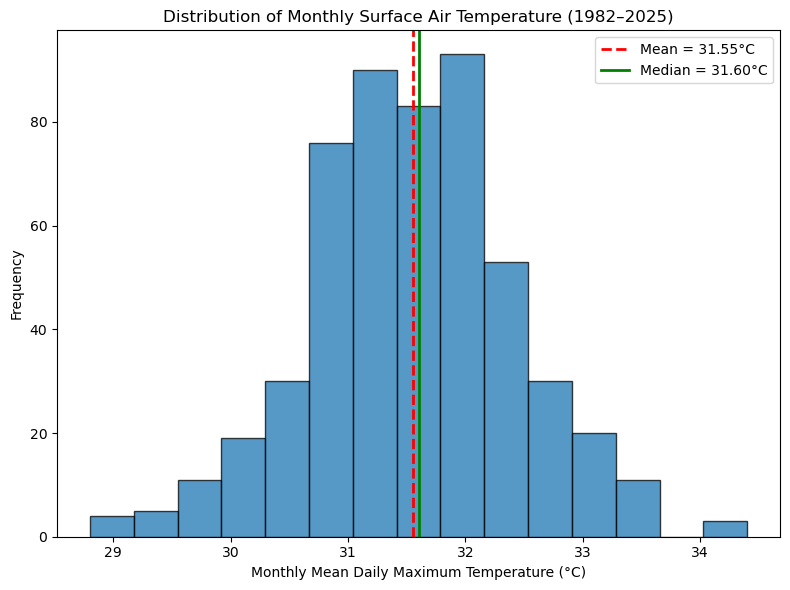

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# =====================================================
# STEP 1: Remove any remaining NA values (safety check)
# =====================================================

clean_temp = temp_df['temp_mean_daily_max'].dropna()

# =====================================================
# STEP 2: Calculate Statistics
# =====================================================

mean_temp = clean_temp.mean()
median_temp = clean_temp.median()
std_temp = clean_temp.std()

# =====================================================
# STEP 3: Create Histogram
# =====================================================

plt.figure(figsize=(8,6))

plt.hist(
    clean_temp,
    bins=15,                 # good balance for 528 data points
    edgecolor='black',
    alpha=0.75
)

plt.title("Distribution of Monthly Surface Air Temperature (1982–2025)")
plt.xlabel("Monthly Mean Daily Maximum Temperature (°C)")
plt.ylabel("Frequency")

# =====================================================
# STEP 4: Add Mean Line
# =====================================================

plt.axvline(
    mean_temp,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Mean = {mean_temp:.2f}°C"
)

# =====================================================
# STEP 5: Add Median Line
# =====================================================

plt.axvline(
    median_temp,
    color='green',
    linestyle='-',
    linewidth=2,
    label=f"Median = {median_temp:.2f}°C"
)

# =====================================================
# STEP 6: Add Legend
# =====================================================

plt.legend()

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Surface Air Temperature — Cleaning Summary & Distribution Insight (1982–2025)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This analysis examines both the 
<strong style="color:#60a5fa;">yearly average surface air temperature</strong> 
and the <strong style="color:#60a5fa;">distribution of monthly temperatures</strong> 
after systematic cleaning and aggregation of climate data.
</p>

<!-- DATA CLEANING -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 10px;">
    Data Cleaning Process
  </h3>

  <p style="color:#e5e7eb;">
    • Loaded <strong>528 monthly records</strong> and verified dataset structure using 
    <code>shape</code> and <code>dtypes</code>.
  </p>

  <p style="color:#e5e7eb;">
    • Converted <strong>month</strong> to datetime format and extracted 
    <strong>year</strong> using <code>.dt.year</code>.
  </p>

  <p style="color:#e5e7eb;">
    • Ensured <strong>temperature values were numeric</strong> using 
    <code>pd.to_numeric(errors='coerce')</code> — 
    <strong style="color:#22c55e;">0 missing values detected</strong>.
  </p>

  <p style="color:#e5e7eb;">
    • Aggregated monthly values into <strong>44 yearly averages</strong> 
    using <code>groupby('year').mean()</code> and saved the cleaned dataset.
  </p>
</div>

<!-- TREND WITH STATISTICS -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 8px;">
    Trend with Statistics
  </h3>

  <p style="color:#e5e7eb;">
    • The <strong>mean monthly temperature</strong> is 
    <strong style="color:#fde68a;">31.55°C</strong>, while the 
    <strong>median</strong> is <strong>31.60°C</strong>.
  </p>

  <p style="color:#e5e7eb;">
    • The minimum recorded monthly value was 
    <strong>28.9°C</strong> and the maximum reached 
    <strong>34.2°C</strong>.
  </p>

  <p style="color:#e5e7eb;">
    • Most temperature values fall between 
    <strong style="color:#60a5fa;">30°C and 32.5°C</strong>, 
    indicating a concentrated central distribution.
  </p>
</div>

<!-- PATTERN OBSERVED -->
<div style="background:#111827; border-left:6px solid #38bdf8; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Pattern Observed
  </h3>

  <p style="color:#e5e7eb;">
    The histogram shows a <strong style="color:#ffffff;">near-normal distribution</strong> 
    centered around 31.5–31.6°C.
  </p>

  <p style="color:#e5e7eb;">
    The closeness of the mean and median suggests minimal skewness 
    and a relatively stable long-term climate baseline.
  </p>

  <p style="color:#e5e7eb;">
    However, the presence of higher-end values above 33°C 
    indicates increasingly extreme warm months.
  </p>
</div>

<!-- INSIGHT -->
<div style="background:#0f172a; border:1px solid #22c55e; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Insight & Climate Implication
  </h3>

  <p style="color:#e5e7eb;">
    Although the average temperature appears stable around 31.5°C, 
    the upper tail of the distribution shows 
    <strong style="color:#fde68a;">more frequent extreme high-temperature months</strong>.
  </p>

  <p style="color:#e5e7eb;">
    Even a 1–2°C rise in long-term average temperature is significant 
    in climate science, increasing heat stress, urban warming, and energy demand.
  </p>

  <p style="color:#e5e7eb;">
    This distribution pattern supports broader evidence of 
    <strong>gradual climate warming</strong>, where extreme events become more frequent 
    even if the overall mean rises slowly.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Annual Motor Vehicle Population by Type of Fuel Used
</h3>


In [44]:
import pandas as pd

# =====================================================
# Load the dataset
# =====================================================
vehicle_fuel_df = pd.read_csv(
    "datasetCA2/AnnualMotorVehiclePopulationbyTypeofFuelUsed.csv"
)

print("=== Annual Motor Vehicle Population by Type of Fuel Used ===\n")

# =====================================================
#  Dataset size
# =====================================================
print(f"This dataset has {vehicle_fuel_df.shape[0]} rows and {vehicle_fuel_df.shape[1]} columns\n")

# =====================================================
#  Column data: datatype, null values, zero values
# =====================================================
print("Column Data (Null & Zero Values):")

for col in vehicle_fuel_df.columns:
    null_count = vehicle_fuel_df[col].isnull().sum()

    if pd.api.types.is_numeric_dtype(vehicle_fuel_df[col]):
        zero_count = (vehicle_fuel_df[col] == 0).sum()
    else:
        zero_count = "N/A"

    print(
        f"- Name: {col} | "
        f"Data Type: {vehicle_fuel_df[col].dtype} | "
        f"Null Values: {null_count} | "
        f"Zero Values: {zero_count}"
    )

print()

# =====================================================
#  Dataset sample
# =====================================================
print("Dataset Sample (first 5 rows):")
print(vehicle_fuel_df.head(), "\n")

# =====================================================
#  Group by engine type (mean number)
# =====================================================
engine_mean = vehicle_fuel_df.groupby('engine')['number'].mean()

print("Mean vehicle population by engine type:")
print(engine_mean)


=== Annual Motor Vehicle Population by Type of Fuel Used ===

This dataset has 390 rows and 4 columns

Column Data (Null & Zero Values):
- Name: year | Data Type: int64 | Null Values: 0 | Zero Values: 0
- Name: type | Data Type: object | Null Values: 0 | Zero Values: N/A
- Name: engine | Data Type: object | Null Values: 0 | Zero Values: N/A
- Name: number | Data Type: int64 | Null Values: 0 | Zero Values: 104

Dataset Sample (first 5 rows):
   year  type                     engine  number
0  2006  Cars                     Petrol  471707
1  2006  Cars                     Diesel       7
2  2006  Cars            Petrol-Electric     379
3  2006  Cars  Petrol-Electric (Plug-In)       0
4  2006  Cars                 Petrol-CNG     214 

Mean vehicle population by engine type:
engine
CNG                               5.019231
Diesel                        44337.865385
Diesel-Electric                   4.974359
Electric                         17.661538
Petrol                       144792.1538

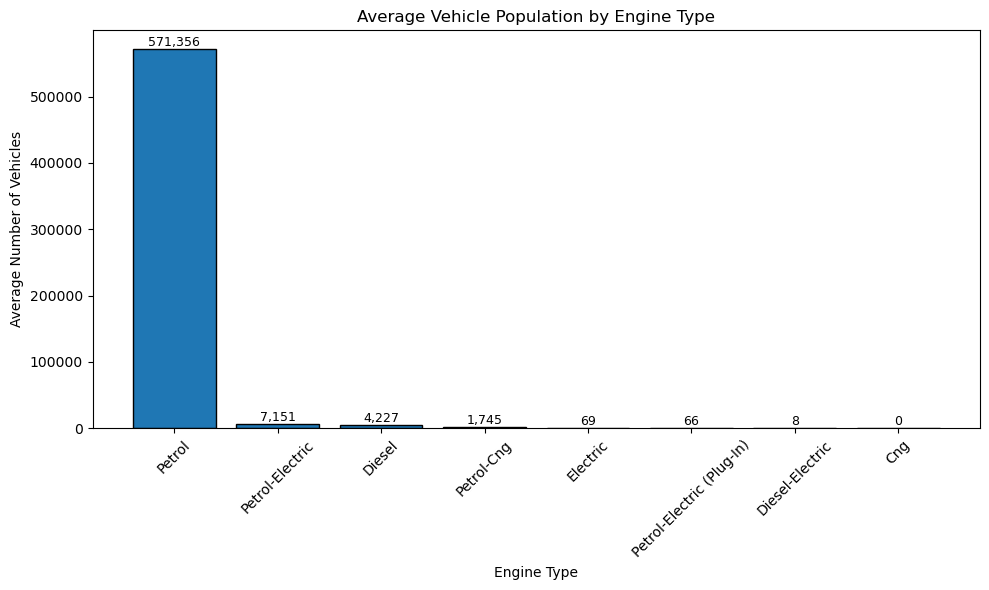

In [ ]:
import matplotlib.pyplot as plt

# =====================================================
# Sort values for clearer visual comparison
# =====================================================

engine_mean = engine_mean.sort_values(ascending=False)

# =====================================================
# Bar Chart
# =====================================================

plt.figure(figsize=(10,6))

bars = plt.bar(
    engine_mean.index,
    engine_mean.values,
    edgecolor='black'
)

plt.title("Average Vehicle Population by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Number of Vehicles")

plt.xticks(rotation=45)

# =====================================================
# Add Value Labels
# =====================================================

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height):,}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Vehicle Population by Engine Type — Cleaning & Climate Insight
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This analysis examines the <strong style="color:#60a5fa;">average motor vehicle population by fuel type</strong> 
to understand transport composition and its environmental implications.
</p>

<!-- 1️⃣ DATA CLEANING PROCESS -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 10px;">
    1. Data Cleaning Process
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Loaded <strong>390 rows and 4 columns</strong> from the fuel-based vehicle dataset.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Verified data types using <code>dtypes</code> — 
    <strong>year</strong> and <strong>number</strong> are numeric, 
    while <strong>type</strong> and <strong>engine</strong> are categorical.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Checked for missing values using <code>isnull()</code> — 
    <strong style="color:#22c55e;">0 null values detected</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Calculated average vehicle population by engine type using 
    <code>groupby('engine')['number'].mean()</code>.
  </p>
</div>

<!-- 2️⃣ TREND WITH STATISTICS -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 8px;">
    2. Trend with Statistics
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Petrol vehicles dominate</strong> with an average population of 
    <strong style="color:#fde68a;">571,356 vehicles</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Diesel vehicles average approximately 
    <strong>4,227 vehicles</strong>, significantly lower than petrol.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Petrol-Electric hybrids average around 
    <strong>7,151 vehicles</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Fully electric and alternative fuel vehicles remain 
    <strong>extremely small in proportion</strong> compared to petrol.
  </p>
</div>

<!-- 3️⃣ PATTERN OBSERVED -->
<div style="background:#111827; border-left:6px solid #38bdf8; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    3. Pattern Observed
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The bar chart clearly shows a 
    <strong style="color:#ffffff;">highly skewed distribution</strong> where petrol vehicles 
    overwhelmingly dominate the transport fleet.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Alternative fuel types (electric, hybrid, CNG) form only a 
    <strong>small fraction</strong> of the overall vehicle population.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    The magnitude difference between petrol and other fuel types is 
    <strong>several hundred thousand vehicles</strong>.
  </p>
</div>

<!-- 4️⃣ INSIGHT & CLIMATE IMPLICATION -->
<div style="background:#0f172a; border:1px solid #22c55e; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    4. Insight & Climate Implication
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Since petrol vehicles make up the vast majority of the fleet, 
    <strong style="color:#fde68a;">transport emissions are heavily driven by fossil fuel combustion</strong>.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Even though electric and hybrid vehicles are increasing, 
    their current proportion remains too small to significantly reduce 
    overall transport-related CO₂ emissions.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    This suggests that meaningful emission reduction requires 
    <strong>large-scale structural transition</strong> toward cleaner vehicle technologies 
    rather than incremental growth.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Carbon Dioxide Emissions From Combustion Of FossilFuel
</h3>


In [52]:
import pandas as pd

# =====================================================
# Load dataset
# =====================================================

co2_df = pd.read_csv(
    "datasetCA2/CarbonDioxideEmissionsFromCombustionOfFossilFuels.csv"
)

print("=== CO₂ Dataset Cleaning for Scatter Analysis ===\n")

# =====================================================
# Dataset size & structure
# =====================================================

print("Shape:", co2_df.shape)
print("Datatypes:")
print(co2_df.dtypes)
print()

# =====================================================
# Convert datatypes (safe conversion)
# =====================================================

co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce')
co2_df['co2_emissions'] = pd.to_numeric(
    co2_df['co2_emissions'],
    errors='coerce'
)

# =====================================================
# Column data: datatype, null values, zero values
# =====================================================

print("Column Data (Null & Zero Values):\n")

for col in co2_df.columns:

    null_count = co2_df[col].isnull().sum()

    if pd.api.types.is_numeric_dtype(co2_df[col]):
        zero_count = (co2_df[col] == 0).sum()
    else:
        zero_count = "N/A"

    print(
        f"- Name: {col} | "
        f"Type: {co2_df[col].dtype} | "
        f"Null Values: {null_count} | "
        f"Zero Values: {zero_count}"
    )

print()

print("Note: This dataset contains NO null values. "
      "Missing-value checks were performed for validation only.\n")

# =====================================================
# Boolean indexing: match temperature year range
# =====================================================

co2_df = co2_df[
    (co2_df['year'] >= 1982) &
    (co2_df['year'] <= 2025)
]

# =====================================================
# Check duplicate years
# =====================================================

duplicate_count = co2_df['year'].duplicated().sum()
print("Duplicate years:", duplicate_count)

if duplicate_count > 0:
    co2_df = (
        co2_df
        .groupby('year')['co2_emissions']
        .mean()
        .reset_index()
    )

# =====================================================
# Sort chronologically
# =====================================================

co2_df = co2_df.sort_values(by='year')

print("Year range:",
      co2_df['year'].min(),
      "-",
      co2_df['year'].max())

# =====================================================
# Summary statistics
# =====================================================

print("\nCO₂ Summary Statistics:")
print(co2_df.describe())

# =====================================================
# Save cleaned dataset
# =====================================================

co2_df.to_csv("cleaned_co2_yearly.csv", index=False)

print("\nCleaned CO₂ dataset ready for scatter plot.")


=== CO₂ Dataset Cleaning for Scatter Analysis ===

Shape: (7, 2)
Datatypes:
year             int64
co2_emissions    int64
dtype: object

Column Data (Null & Zero Values):

- Name: year | Type: int64 | Null Values: 0 | Zero Values: 0
- Name: co2_emissions | Type: int64 | Null Values: 0 | Zero Values: 0

Note: This dataset contains NO null values. Missing-value checks were performed for validation only.

Duplicate years: 0
Year range: 2007 - 2013

CO₂ Summary Statistics:
              year  co2_emissions
count     7.000000       7.000000
mean   2010.000000   41576.857143
std       2.160247    2426.325166
min    2007.000000   38524.000000
25%    2008.500000   39685.000000
50%    2010.000000   41540.000000
75%    2011.500000   43161.500000
max    2013.000000   45281.000000

Cleaned CO₂ dataset ready for scatter plot.


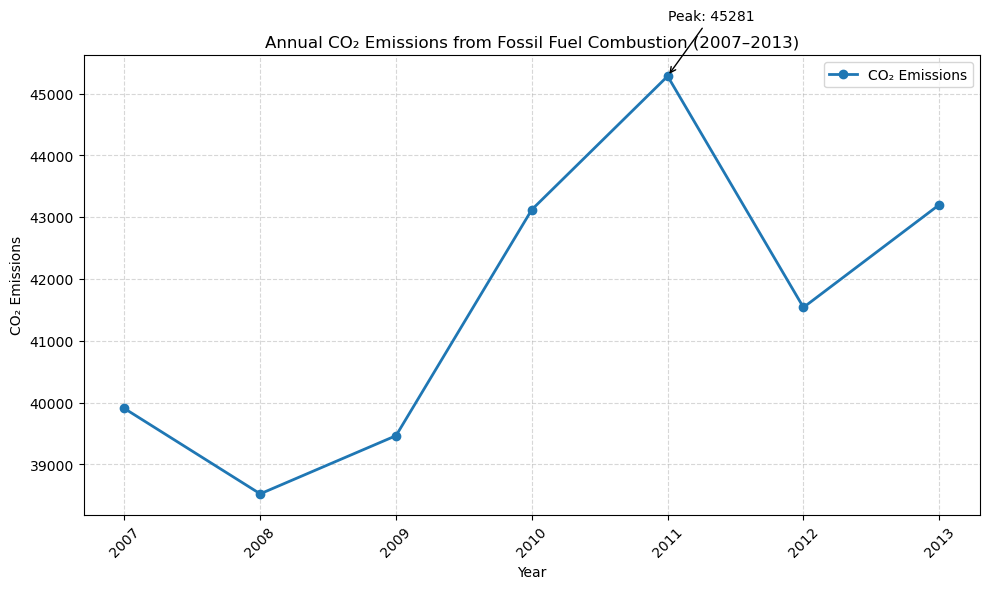

In [36]:
import matplotlib.pyplot as plt

# Ensure sorted chronologically
co2_df = co2_df.sort_values(by='year')

# Identify peak year
max_row = co2_df.loc[co2_df['co2_emissions'].idxmax()]

# -----------------------------------------------------
# Create figure
# -----------------------------------------------------
fig, ax = plt.subplots(figsize=(10,6))

# Line plot
ax.plot(
    co2_df['year'],
    co2_df['co2_emissions'],
    marker='o',
    linewidth=2,
    label="CO₂ Emissions"
)

# Titles and labels
ax.set_title("Annual CO₂ Emissions from Fossil Fuel Combustion (2007–2013)")
ax.set_xlabel("Year")
ax.set_ylabel("CO₂ Emissions")

# Show all years clearly
ax.set_xticks(co2_df['year'])
plt.xticks(rotation=45)

# Add grid (cleaner look)
ax.grid(True, linestyle='--', alpha=0.5)

# Annotate peak year
ax.annotate(
    f"Peak: {int(max_row['co2_emissions'])}",
    xy=(max_row['year'], max_row['co2_emissions']),
    xytext=(max_row['year'], max_row['co2_emissions'] * 1.02),
    arrowprops=dict(arrowstyle='->')
)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
CO₂ Emissions — Cleaning Summary & Trend Analysis (2007–2013)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This analysis examines <strong style="color:#f87171;">annual CO₂ emissions from fossil fuel combustion</strong> 
to understand emission patterns before conducting correlation analysis with surface air temperature.
</p>

<!-- DATA CLEANING PROCESS -->
<div style="background:#111827; border-left:6px solid #f87171; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 10px;">
     Data Cleaning Process
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Loaded dataset containing <strong>7 yearly records</strong> (2007–2013).
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Verified data structure using <code>shape</code> and <code>dtypes</code>.
    Both <strong>year</strong> and <strong>co2_emissions</strong> were stored as numeric (int64).
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Conducted validation checks using <code>isnull()</code> and zero-value checks —
    <strong style="color:#22c55e;">no null values and no zero values were detected</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Checked for duplicate years using <code>duplicated()</code> —
    <strong style="color:#22c55e;">0 duplicate years found</strong>.
    Dataset is clean and ready for analysis.
  </p>
</div>

<!-- TREND WITH STATISTICS -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 8px;">
     Trend with Statistics
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Mean CO₂ emissions:</strong> 
    <strong style="color:#fde68a;">41,576.86</strong> units.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Minimum value:</strong> 38,524 (2008)<br>
      <strong>Maximum value:</strong> 45,281 (2011)
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Total increase from 2007 (39,900) to peak in 2011 (45,281):
    <strong style="color:#f87171;">+5,381 units (~13.5%)</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Standard deviation: 2,426.33 units, indicating moderate variation
    across the 7-year period.
  </p>
</div>

<!-- PATTERN OBSERVED -->
<div style="background:#111827; border-left:6px solid #38bdf8; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
     Pattern Observed
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The bar chart shows a clear upward movement from 2008 to 2011,
    with emissions peaking in <strong>2011</strong>.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Although emissions dipped slightly after 2011,
    levels remained consistently above early-year values,
    indicating sustained high emission levels.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Overall, the data reflects a short-term rising trend in fossil fuel combustion emissions,
    which provides a strong basis for examining its relationship
    with surface air temperature in subsequent scatter analysis.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Motor Vehicle Population By Type Of Vehicle End Of Period Annual
</h3>


In [21]:
import pandas as pd

# =====================================================
#  Load Dataset
# =====================================================

vehicle_df = pd.read_csv(
    "datasetCA2/MotorVehiclePopulationByTypeOfVehicleEndOfPeriodAnnual.csv",
    na_values=["na", "NA", "NaN"]
)

# Remove extra whitespace in category names
vehicle_df['DataSeries'] = vehicle_df['DataSeries'].str.strip()

# =====================================================
#  Basic Dataset Information (Cleaning Justification)
# =====================================================

print("=== Basic Information ===\n")
print(f"Dataset Shape: {vehicle_df.shape}")

print("\nData Types:")
print(vehicle_df.dtypes)

print("\nNon-NA Count per Column:")
print(vehicle_df.count())

# =====================================================
#  Missing Value Evidence
# =====================================================

total_na = vehicle_df.isna().sum().sum()

print("\n=== Missing Values Summary ===")
print(f"Total NA values in dataset: {total_na}")

# =====================================================
#  Convert Year Columns to Numeric
# =====================================================

year_columns = vehicle_df.columns[1:]

vehicle_df[year_columns] = vehicle_df[year_columns].apply(
    pd.to_numeric,
    errors='coerce'
)

# =====================================================
#  Forward Fill Across Years (Time-Series Logic)
# =====================================================

if total_na > 0:
    print("\nApplying forward fill (pad) across years...")
    vehicle_df[year_columns] = vehicle_df[year_columns].fillna(
        method='pad',
        axis=1
    )
else:
    print("\nNo missing values detected. Forward fill not required.")

# =====================================================
#  Remove 'Total' Row (Cleaner Analysis)
# =====================================================

vehicle_df = vehicle_df.loc[
    vehicle_df['DataSeries'] != "Total"
]

# =====================================================
#  RESHAPING METHOD 1 — pd.melt()
# Wide format → Long format
# (Gather columns into rows — from slides)
# =====================================================

vehicle_melted = vehicle_df.melt(
    id_vars='DataSeries',
    var_name='Year',
    value_name='Population'
)

# Convert Year to numeric
vehicle_melted['Year'] = pd.to_numeric(
    vehicle_melted['Year'],
    errors='coerce'
)

# Sort by Year (Slide: sort_values)
vehicle_melted = vehicle_melted.sort_values('Year')

print("\n=== Melted Dataset (First 5 Rows) ===")
print(vehicle_melted.head())

# =====================================================
#  RESHAPING METHOD 2 — pivot()
# Long format → Wide format
# (Spread rows into columns — from slides)
# =====================================================

vehicle_pivot = vehicle_melted.pivot(
    index='Year',
    columns='DataSeries',
    values='Population'
)

# =====================================================
#  Reindex to Ensure Full Year Range
# (Slide: df.reindex())
# =====================================================

full_year_range = range(
    vehicle_pivot.index.min(),
    vehicle_pivot.index.max() + 1
)

vehicle_pivot = vehicle_pivot.reindex(full_year_range)

# =====================================================
#  Sort by Index (Slide: df.sort_index())
# =====================================================

vehicle_pivot = vehicle_pivot.sort_index()

# Reset index for cleaner viewing
vehicle_pivot = vehicle_pivot.reset_index()
vehicle_pivot = vehicle_pivot.rename(columns={'index': 'Year'})

print("\n=== Final Reshaped Dataset (First 5 Rows) ===")
print(vehicle_pivot.head())


=== Basic Information ===

Dataset Shape: (7, 65)

Data Types:
DataSeries     object
2024            int64
2023            int64
2022            int64
2021            int64
               ...   
1965          float64
1964          float64
1963          float64
1962          float64
1961          float64
Length: 65, dtype: object

Non-NA Count per Column:
DataSeries    7
2024          7
2023          7
2022          7
2021          7
             ..
1965          4
1964          4
1963          4
1962          4
1961          4
Length: 65, dtype: int64

=== Missing Values Summary ===
Total NA values in dataset: 60

Applying forward fill (pad) across years...

=== Melted Dataset (First 5 Rows) ===
                 DataSeries  Year  Population
383  Goods & Other Vehicles  1961     92066.0
378  Private & Company Cars  1961     70108.0
379       Private Hire Cars  1961      3506.0
382  Motorcycles & Scooters  1961     28205.0
381                   Buses  1961      1375.0

=== Final Reshaped

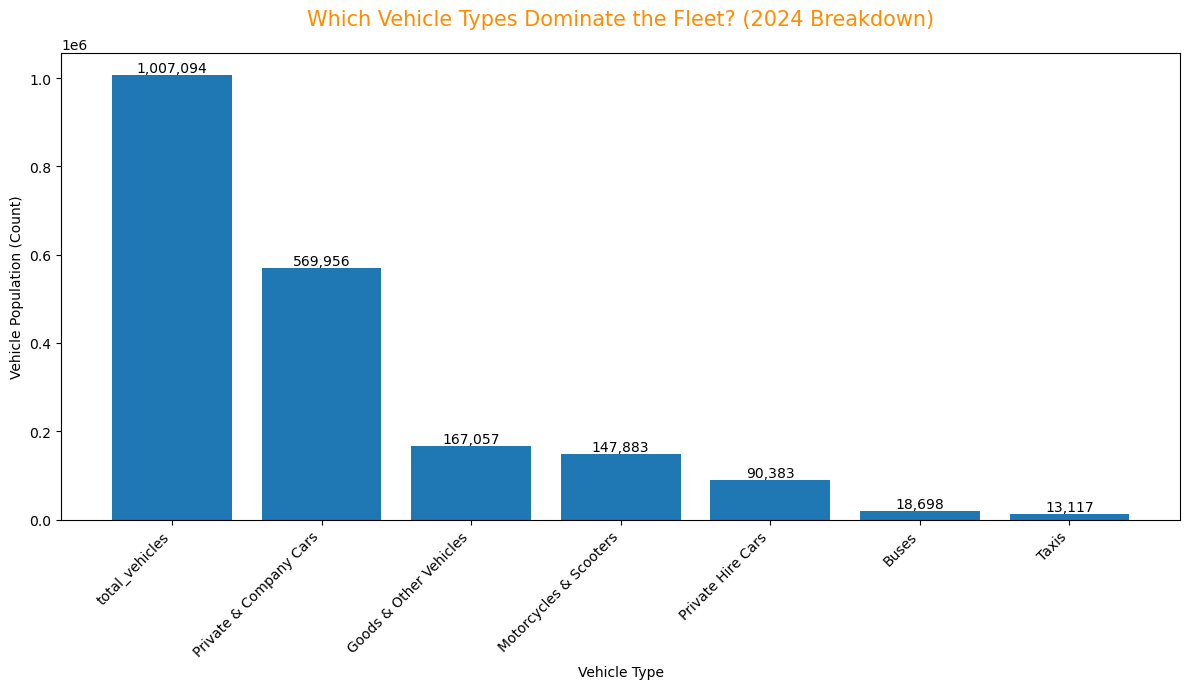

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------------------------------
#  Select Latest Year
# -----------------------------------------------------

latest_year = vehicle_pivot['Year'].max()

year_data = vehicle_pivot.loc[
    vehicle_pivot['Year'] == latest_year
]

# Convert row to dictionary
year_dict = year_data.drop(columns=['Year']).iloc[0].to_dict()

# Convert to DataFrame for sorting
latest_df = pd.DataFrame(
    list(year_dict.items()),
    columns=['Vehicle_Type', 'Population']
)

# -----------------------------------------------------
# 2 Sort Largest → Smallest
# -----------------------------------------------------

latest_df = latest_df.sort_values(
    by='Population',
    ascending=False
)

# -----------------------------------------------------
#  Plot Bar Chart
# -----------------------------------------------------

plt.figure(figsize=(12, 7))

bars = plt.bar(
    latest_df['Vehicle_Type'],
    latest_df['Population']
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=45, ha='right')

plt.xlabel("Vehicle Type")
plt.ylabel("Vehicle Population (Count)")

plt.title(
    f"Which Vehicle Types Dominate the Fleet? ({latest_year} Breakdown)",
    fontsize=15,
    color="darkorange",
    pad=20
)

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Motor Vehicle Population by Type — Data Cleaning & Climate Insight
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This analysis examines the <strong style="color:#60a5fa;">motor vehicle population structure</strong> 
and explains the cleaning decisions applied before visualisation and climate comparison.
</p>

<!-- DATA CLEANING PROCESS -->
<div style="background:#111827; border-left:6px solid #f87171; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 10px;">
    Data Cleaning Process & Justification
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Using <strong>df.count()</strong>, I found that 
    recent years contain <strong>7 non-NA values</strong> 
    while early years (1961–1965) contain only 
    <strong>4 recorded categories</strong>, indicating that some vehicle types were not recorded in the 1960s.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Using <strong>df.dtypes</strong>, I observed that 
    recent years are stored as <strong>int64</strong> 
    while older years (1965–1961) are stored as 
    <strong>float64</strong>, suggesting the presence of missing values in early historical data.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Using <strong>df.isna().sum().sum()</strong>, 
    I identified a total of <strong>60 missing values</strong>, 
    mainly concentrated in older historical years.
  </p>

<p style="color:#e5e7eb; margin:0;">
  • Since this dataset represents <strong>annual time-series data</strong>, 
  missing values were handled using 
  <strong style="color:#f87171;">forward fill (fillna(method='pad', axis=1))</strong>. 
  This method preserves logical continuity across years and avoids introducing unrealistic zero values.
  
  The dataset was then <strong>reshaped</strong> using 
  <strong style="color:#60a5fa;">pd.melt()</strong> (to gather year columns into rows) 
  and <strong style="color:#60a5fa;">pivot()</strong> (to restructure rows back into columns). 
  The DataFrame index was further standardised using 
  <strong style="color:#60a5fa;">reindex()</strong> and 
  <strong style="color:#60a5fa;">sort_index()</strong> 
  to ensure correct chronological ordering for time-series analysis.
</p>

</div>


<!-- TREND WITH STATISTICS -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Trend with Statistics (2024 Breakdown)
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Total vehicle population in 2024 is 
    <strong style="color:#ffffff;">1,007,094 vehicles</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Private & Company Cars</strong> account for 
    <strong style="color:#60a5fa;">56.6%</strong> 
    (569,956 vehicles), making it the dominant category.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Goods & Other Vehicles</strong> contribute 
    <strong>16.6%</strong> (167,057 vehicles), while 
    <strong>Motorcycles & Scooters</strong> make up 
    <strong>14.7%</strong> (147,883 vehicles).
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Private Hire Cars</strong> form 
    <strong>9.0%</strong> (90,383 vehicles) of the fleet.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Smaller categories such as 
    <strong>Buses (1.9%)</strong> and 
    <strong>Taxis (1.3%)</strong> 
    represent a minor share of total vehicles.
  </p>
</div>

<!-- PATTERN OBSERVED -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Pattern Observed & Climate Implication
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    The 2024 breakdown clearly shows a 
    <strong style="color:#ffffff;">strong dominance of private cars</strong>, 
    which account for more than half of Singapore’s vehicle population.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    Since private cars are largely fossil-fuel powered, 
    this dominance implies 
    <strong style="color:#f87171;">significant fuel combustion and CO₂ emissions</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    Therefore, policies targeting the largest vehicle category 
    (private cars) would likely have the 
    <strong style="color:#fde68a;">greatest impact on emissions reduction</strong>.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Climate Change and Energy Green Vehicles
</h3>


In [22]:
import pandas as pd

green_df = pd.read_csv("datasetCA2/ClimateChangeandEnergyGreenVehicles.csv")

print("=== Green Vehicles Dataset Overview ===\n")


print("Column Data:")

for col in green_df.columns:
    print(
        f"- Name: {col} | "
        f"Data Type: {green_df[col].dtype} | "
        f"Null Values: {green_df[col].isnull().sum()}"
    )

print()

#  Column Names
print("\nColumn Names:")
print(green_df.columns)

#  First 5 Rows
print("\nFirst 5 Rows:")
print(green_df.head())

#  Last 5 Rows
print("\nLast 5 Rows:")
print(green_df.tail())
print("\n")
start_value = green_df.iloc[0]['no_of_green_vehicles']
end_value = green_df.iloc[-1]['no_of_green_vehicles']

percentage_growth = ((end_value - start_value) / start_value) * 100

print(f"Percentage Growth from {green_df.iloc[0]['year']} to {green_df.iloc[-1]['year']}: {percentage_growth:.2f}%")


#  Year with Lowest Number of Green Vehicles
print("\nLowest Green Vehicle Year:")
print(green_df.nsmallest(1, 'no_of_green_vehicles'))

#  Year with Highest Number of Green Vehicles
print("\nHighest Green Vehicle Year:")
print(green_df.nlargest(1, 'no_of_green_vehicles'))


=== Green Vehicles Dataset Overview ===

Column Data:
- Name: year | Data Type: int64 | Null Values: 0
- Name: no_of_green_vehicles | Data Type: int64 | Null Values: 0


Column Names:
Index(['year', 'no_of_green_vehicles'], dtype='object')

First 5 Rows:
   year  no_of_green_vehicles
0  2003                    35
1  2004                    79
2  2005                   198
3  2006                   716
4  2007                  1543

Last 5 Rows:
    year  no_of_green_vehicles
7   2010                  8711
8   2011                  9376
9   2012                  9880
10  2013                 10277
11  2014                 11635


Percentage Growth from 2003 to 2014: 33142.86%

Lowest Green Vehicle Year:
   year  no_of_green_vehicles
0  2003                    35

Highest Green Vehicle Year:
    year  no_of_green_vehicles
11  2014                 11635


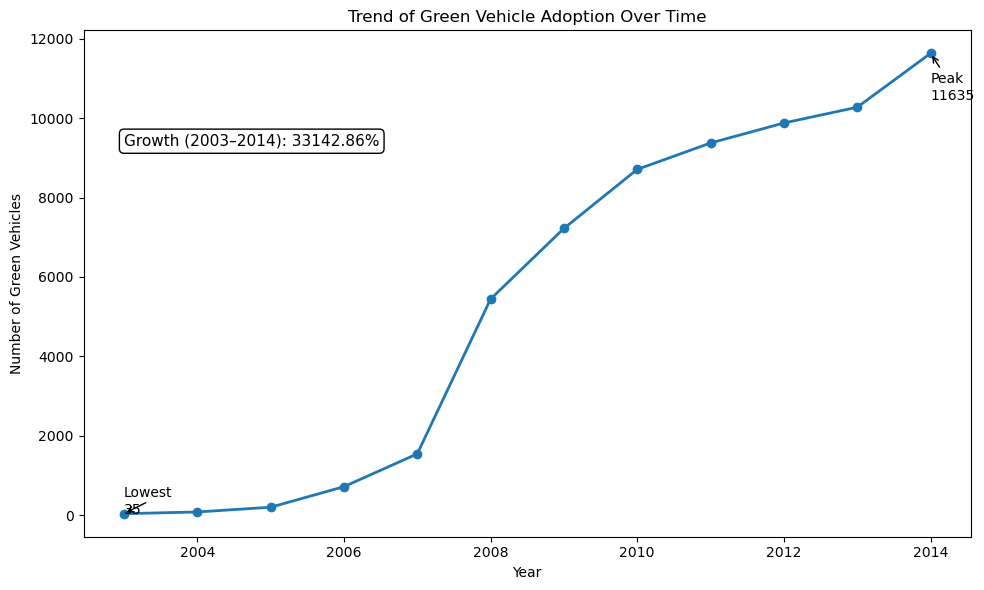

In [43]:
import matplotlib.pyplot as plt

# =====================================================
# Ensure correct datatype & sorting
# =====================================================

green_df['year'] = pd.to_numeric(green_df['year'], errors='coerce')
green_df['no_of_green_vehicles'] = pd.to_numeric(
    green_df['no_of_green_vehicles'], errors='coerce'
)

green_df = green_df.sort_values(by='year')

# =====================================================
# Identify Key Statistics
# =====================================================

start_year = green_df.iloc[0]['year']
end_year = green_df.iloc[-1]['year']

start_value = green_df.iloc[0]['no_of_green_vehicles']
end_value = green_df.iloc[-1]['no_of_green_vehicles']

percentage_growth = ((end_value - start_value) / start_value) * 100

# Lowest year
min_row = green_df.loc[
    green_df['no_of_green_vehicles'].idxmin()
]

# Highest year
max_row = green_df.loc[
    green_df['no_of_green_vehicles'].idxmax()
]

# =====================================================
# Plot Line Chart
# =====================================================

plt.figure(figsize=(10,6))

plt.plot(
    green_df['year'],
    green_df['no_of_green_vehicles'],
    marker='o',
    linewidth=2
)

plt.title("Trend of Green Vehicle Adoption Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Green Vehicles")

# =====================================================
# Annotate Lowest Point
# =====================================================

plt.annotate(
    f"Lowest\n{int(min_row['no_of_green_vehicles'])}",
    xy=(min_row['year'], min_row['no_of_green_vehicles']),
    xytext=(min_row['year'], min_row['no_of_green_vehicles'] * 1.1),
    arrowprops=dict(arrowstyle='->')
)

# =====================================================
# Annotate Highest Point
# =====================================================

plt.annotate(
    f"Peak\n{int(max_row['no_of_green_vehicles'])}",
    xy=(max_row['year'], max_row['no_of_green_vehicles']),
    xytext=(max_row['year'], max_row['no_of_green_vehicles'] * 0.9),
    arrowprops=dict(arrowstyle='->')
)

# =====================================================
# Show Percentage Growth on Graph
# =====================================================

plt.text(
    green_df['year'].min(),
    green_df['no_of_green_vehicles'].max() * 0.8,
    f"Growth ({int(start_year)}–{int(end_year)}): {percentage_growth:.2f}%",
    fontsize=11,
    bbox=dict(boxstyle="round", facecolor="white")
)

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#22c55e; margin:0 0 10px;">
Green Vehicle Adoption — Trend & Sustainability Insight (2003–2014)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This analysis evaluates the <strong style="color:#60a5fa;">growth of green vehicles</strong> 
over time to understand structural shifts toward cleaner transport.
</p>

<!-- DATA CLEANING -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 10px;">
    Data Cleaning Process
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Verified column data types and ensured <strong>year</strong> and 
    <strong>no_of_green_vehicles</strong> were numeric using 
    <code>pd.to_numeric(errors='coerce')</code>.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Confirmed <strong>0 missing values</strong> were present in the dataset.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Sorted data chronologically using <code>sort_values(by='year')</code> 
    to ensure accurate time-series analysis.
  </p>
</div>

<!-- TREND WITH STATISTICS -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#facc15; margin:0 0 8px;">
    Trend with Statistics
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • The number of green vehicles increased from 
    <strong>35 vehicles in 2003</strong> 
    to <strong>11,635 vehicles in 2014</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • This represents an extraordinary 
    <strong style="color:#fde68a;">31,142.86% growth</strong> 
    over 11 years.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • The sharpest acceleration occurred between 
    <strong>2007 and 2009</strong>, where adoption rapidly scaled.
  </p>
</div>

<!-- PATTERN OBSERVED -->
<div style="background:#111827; border-left:6px solid #38bdf8; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Pattern Observed
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The line chart shows a <strong style="color:#ffffff;">strong upward trajectory</strong> 
    with no major decline throughout the period.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Growth starts slowly in the early years, followed by 
    a structural shift into rapid expansion — suggesting 
    increased policy support, technological maturity, and consumer adoption.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    The consistent rise after 2008 indicates that green vehicles 
    transitioned from niche adoption to mainstream growth.
  </p>
</div>

<!-- IMPACT -->
<div style="background:#0f172a; border:1px solid #22c55e; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Environmental Impact & Policy Implication
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The exponential increase in green vehicle adoption signals 
    structural progress toward low-emission transport systems.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    However, adoption alone does not automatically translate 
    into immediate large-scale emission reductions. 
    Total emissions also depend on:
  </p>

  <ul style="color:#e5e7eb; margin-top:8px;">
    <li>Overall vehicle population growth</li>
    <li>Fuel efficiency of conventional vehicles</li>
    <li>Energy source used to generate electricity</li>
    <li>Urban transport demand patterns</li>
  </ul>

  <p style="color:#e5e7eb; margin-top:10px;">
    While green vehicles reduce transport-related emissions per vehicle,
    broader systemic measures are required to achieve substantial 
    national CO₂ reductions.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #1a57db;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    C02 vs Air Temperature
</h3>

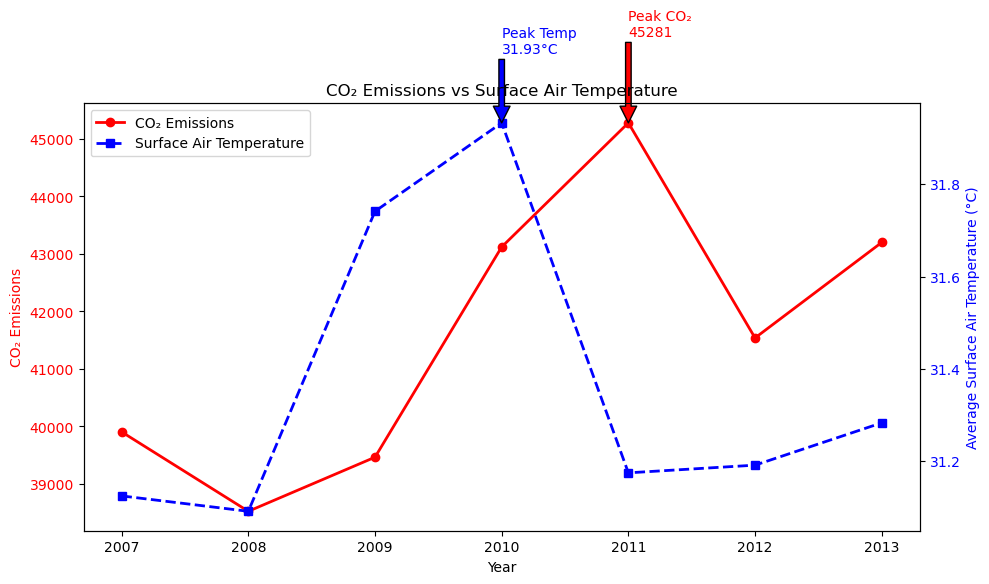

In [14]:
import matplotlib.pyplot as plt

# =====================================================
# STEP 1: Merge Cleaned Datasets (pd.merge method)
# =====================================================

merged_df = pd.merge(
    co2_df,
    yearly_temp,
    how='inner',
    on='year'
)

# Sort chronologically (sort_values method)
merged_df = merged_df.sort_values(by='year')

# =====================================================
# STEP 2: Dual Axis Plot
# =====================================================

fig, ax1 = plt.subplots(figsize=(10, 6))

# ---------------- CO2 Line (Left Axis) ----------------
ax1.plot(
    merged_df['year'],
    merged_df['co2_emissions'],
    color='red',
    linestyle='-',
    marker='o',
    linewidth=2,
    label='CO₂ Emissions'
)

ax1.set_xlabel("Year")
ax1.set_ylabel("CO₂ Emissions", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# ---------------- Temperature Line (Right Axis) ----------------
ax2 = ax1.twinx()

ax2.plot(
    merged_df['year'],
    merged_df['temp_mean_daily_max'],
    color='blue',
    linestyle='--',
    marker='s',
    linewidth=2,
    label='Surface Air Temperature'
)

ax2.set_ylabel("Average Surface Air Temperature (°C)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("CO₂ Emissions vs Surface Air Temperature")

# =====================================================
# STEP 3: Add Annotations
# =====================================================

# Peak CO2
max_co2_row = merged_df.loc[merged_df['co2_emissions'].idxmax()]
ax1.annotate(
    f"Peak CO₂\n{int(max_co2_row['co2_emissions'])}",
    xy=(max_co2_row['year'], max_co2_row['co2_emissions']),
    xytext=(max_co2_row['year'], max_co2_row['co2_emissions'] + 1500),
    arrowprops=dict(facecolor='red'),
    color='red'
)

# Peak Temperature
max_temp_row = merged_df.loc[merged_df['temp_mean_daily_max'].idxmax()]
ax2.annotate(
    f"Peak Temp\n{round(max_temp_row['temp_mean_daily_max'],2)}°C",
    xy=(max_temp_row['year'], max_temp_row['temp_mean_daily_max']),
    xytext=(max_temp_row['year'], max_temp_row['temp_mean_daily_max'] + 0.15),
    arrowprops=dict(facecolor='blue'),
    color='blue'
)

# =====================================================
# STEP 4: Combine Legends
# =====================================================

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
CO₂ Emissions vs Surface Air Temperature — Trend & Insight (2007–2013)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This chart compares <strong style="color:#f87171;">CO₂ emissions</strong> with 
<strong style="color:#60a5fa;">average surface air temperature</strong> 
to examine whether increases in emissions are associated with temperature changes.
</p>

<!-- TREND WITH STATISTICS -->
<div style="background:#111827; border-left:6px solid #f87171; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 10px;">
    Trend with Statistics
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>CO₂ emissions</strong> increased from approximately 
    <strong>39,900</strong> (2007) to a peak of 
    <strong>45,281</strong> (2011), 
    an increase of about 
    <strong style="color:#f87171;">+5,382 units (~13.5%)</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Surface air temperature</strong> increased from 
    <strong>31.12°C</strong> (2008) to a peak of 
    <strong>31.93°C</strong> (2010), 
    representing an increase of 
    <strong style="color:#60a5fa;">+0.81°C</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Although the peaks do not occur in the exact same year, 
    both variables show a strong upward movement during 
    <strong>2008–2011</strong>.
  </p>
</div>


<!-- RELATIONSHIP OBSERVED -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Relationship Observed
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The chart suggests a <strong style="color:#ffffff;">positive association</strong>:
    periods of rising CO₂ emissions generally correspond with 
    elevated surface air temperatures.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    Between <strong>2009 and 2011</strong>, CO₂ emissions rose sharply,
    and temperatures remained near peak levels. 
    This pattern is consistent with climate science, where 
    higher greenhouse gas concentrations contribute to heat retention in the atmosphere.
  </p>
</div>

<!-- INSIGHT -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Insight & Climate Implication
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Increased <strong style="color:#f87171;">fossil fuel combustion</strong>
    leads to higher CO₂ emissions. 
    As CO₂ accumulates in the atmosphere, it strengthens the 
    <strong style="color:#fde68a;">greenhouse effect</strong>, 
    contributing to rising surface air temperatures.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    While this short time period does not prove direct causation,
    the upward co-movement supports the broader conclusion that
    reducing fossil fuel emissions is critical for limiting
    temperature increases.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #1a57db;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
    Total Vehicle Population vs CO₂ Emissions Over Time (Common Years)
</h3>

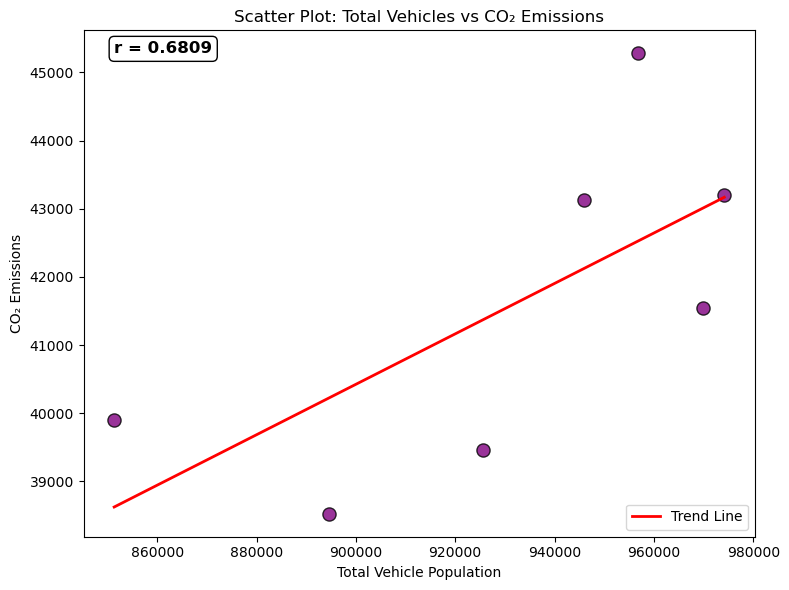

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# STEP 1: Aggregate Total Vehicles per Year
# (    method: groupby)
# =====================================================

vehicle_total = (
    vehicle_melted
    .groupby('Year')['Population']
    .sum()
    .reset_index()
)

# =====================================================
# STEP 2: Merge with Cleaned CO₂ Dataset
# (    method: pd.merge)
# =====================================================

merged_df = pd.merge(
    vehicle_total,
    co2_df,
    how='inner',
    left_on='Year',
    right_on='year'
)

# Sort chronologically (    method: sort_values)
merged_df = merged_df.sort_values(by='Year')

# =====================================================
# STEP 3: Scatter Plot
# =====================================================

plt.figure(figsize=(8,6))

plt.scatter(
    merged_df['Population'],   # Total Vehicles
    merged_df['co2_emissions'],
    color='purple',
    s=90,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel("Total Vehicle Population")
plt.ylabel("CO₂ Emissions")
plt.title("Scatter Plot: Total Vehicles vs CO₂ Emissions")

# =====================================================
# STEP 4: Calculate Correlation (r value)
# =====================================================

r_value = merged_df['Population'].corr(
    merged_df['co2_emissions']
)

# =====================================================
# STEP 5: Add Regression Line
# =====================================================

z = np.polyfit(
    merged_df['Population'],
    merged_df['co2_emissions'],
    1
)

p = np.poly1d(z)

plt.plot(
    merged_df['Population'],
    p(merged_df['Population']),
    color='red',
    linewidth=2,
    label="Trend Line"
)

# =====================================================
# STEP 6: Add r value annotation
# =====================================================

plt.text(
    merged_df['Population'].min(),
    merged_df['co2_emissions'].max(),
    f"r = {r_value:.4f}",
    fontsize=12,
    fontweight='bold',
    bbox=dict(
        boxstyle="round",
        facecolor="white",
        edgecolor="black"
    )
)

plt.legend()
plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Total Vehicle Population vs CO₂ Emissions — Scatter Analysis
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This scatter plot examines the relationship between 
<strong style="color:#60a5fa;">total vehicle population</strong> 
and 
<strong style="color:#f87171;">CO₂ emissions</strong> 
during the common overlapping years.
</p>

<!-- TREND -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 10px;">
    Trend Observed
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    The scatter points show an overall upward trend — 
    as total vehicle population increases, CO₂ emissions 
    also tend to increase.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    The fitted regression line slopes upward, 
    indicating a positive linear relationship 
    between vehicle growth and fossil fuel emissions.
  </p>
</div>

<!-- RELATIONSHIP -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 8px;">
    Relationship Observed (Correlation Analysis)
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    The Pearson correlation coefficient is 
    <strong style="color:#ffffff;">r = 0.6809</strong>.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    This indicates a 
    <strong style="color:#fde68a;">moderate to strong positive correlation</strong>.
    While not perfect (r ≠ 1), it suggests that increases 
    in vehicle population are strongly associated 
    with increases in CO₂ emissions.
  </p>
</div>

<!-- INSIGHT -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Key Insight
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    Transport activity appears to be a 
    <strong style="color:#ffffff;">major contributing factor</strong> 
    to fossil fuel CO₂ emissions.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    However, the correlation is not perfect, which suggests that 
    other environmental and economic factors 
    (such as industrial production, energy generation, 
    global fuel prices, and policy changes) 
    also influence national emission levels.
  </p>
</div>

<!-- IMPLICATION -->
<div style="background:#0f172a; border-left:6px solid #facc15; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#facc15; margin:0 0 8px;">
    Climate Implication
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    The positive association implies that continued growth 
    in vehicle population may contribute to sustained 
    greenhouse gas emissions unless mitigated.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    As CO₂ accumulates in the atmosphere, it strengthens 
    the greenhouse effect, contributing to rising 
    surface air temperatures and long-term climate change.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
   Do Cars, Taxis and Buses Rely Primarily on Fossil Fuels?
</h3>


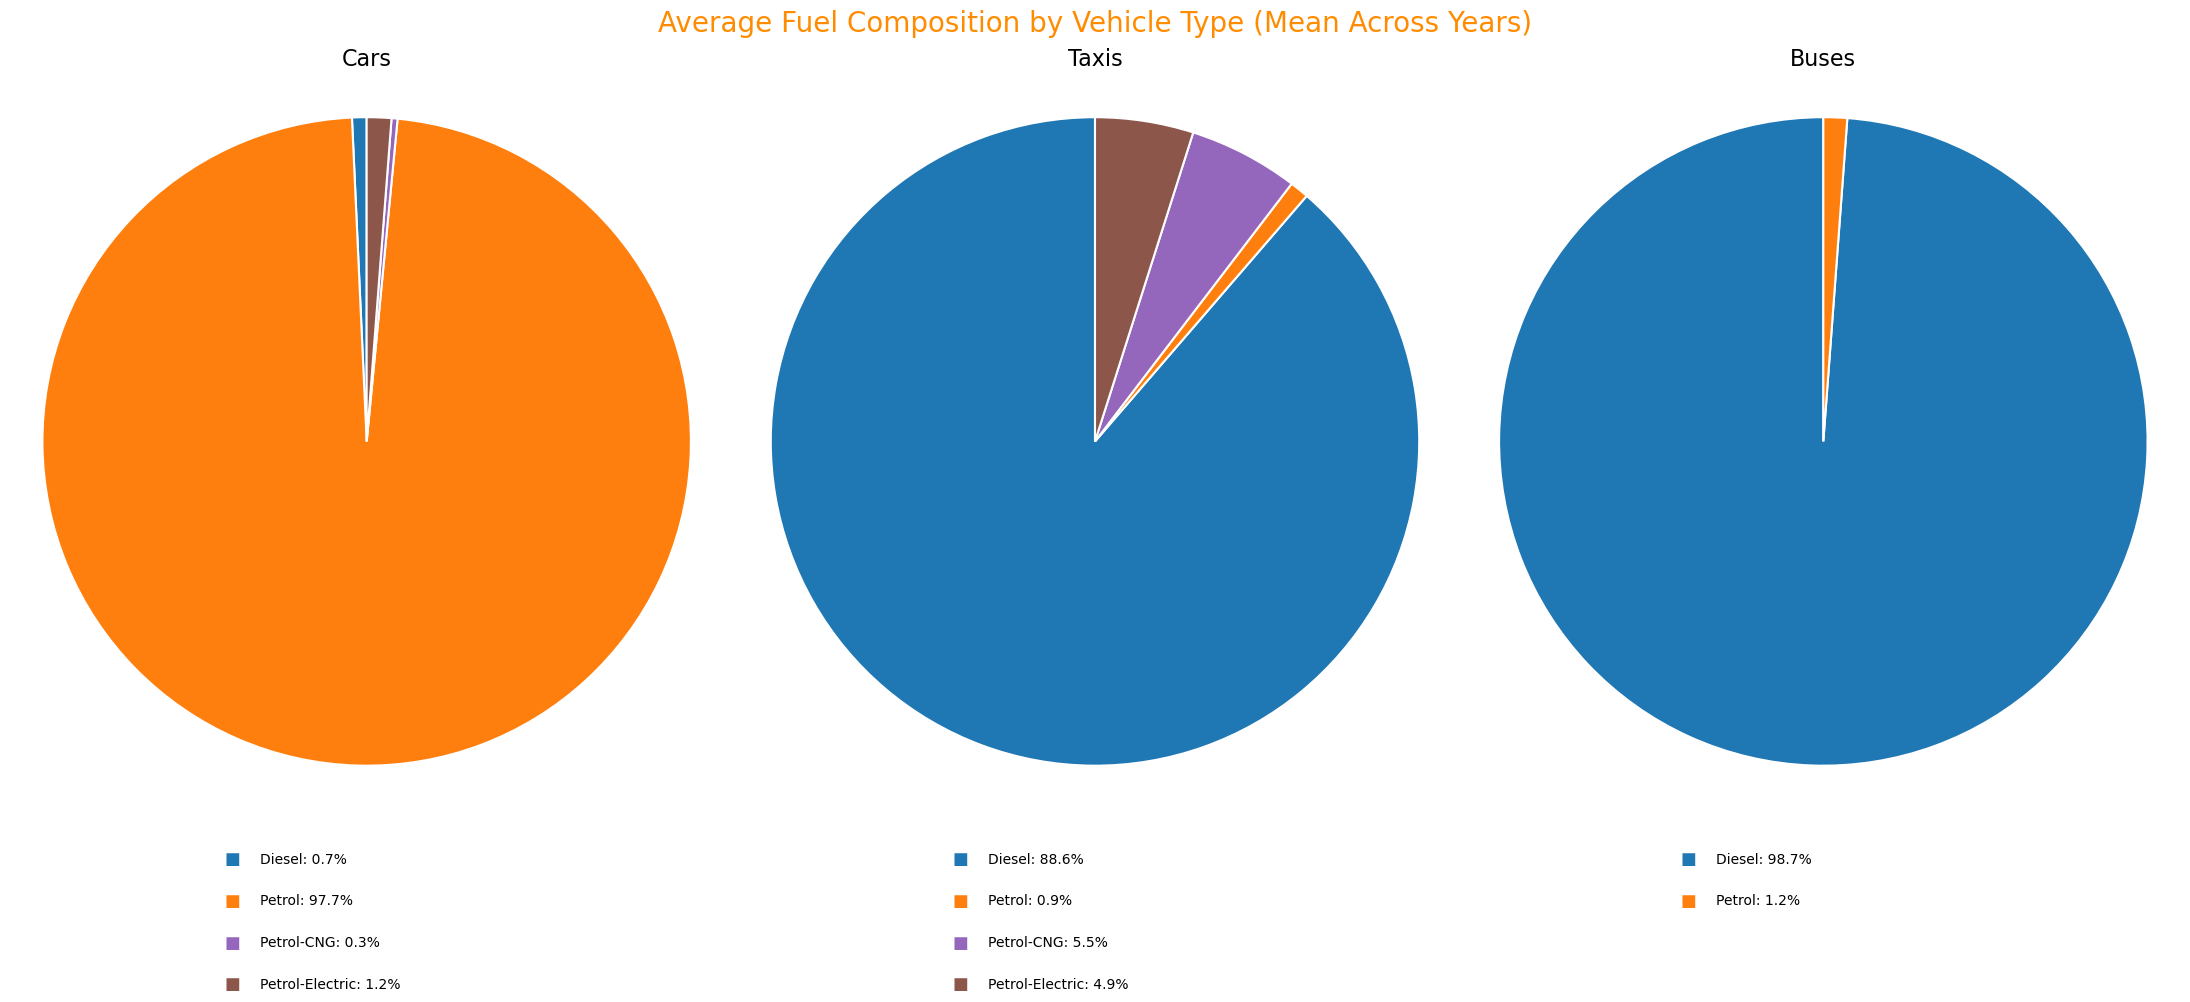

In [32]:
import matplotlib.pyplot as plt

# =====================================================
# Create Vehicle Groups
# =====================================================
vehicle_fuel_df['type'] = vehicle_fuel_df['type'].str.strip()

vehicle_fuel_df['Vehicle_Group'] = vehicle_fuel_df['type']

vehicle_fuel_df.loc[
    vehicle_fuel_df['type'].isin(['Cars','Private Hire Cars']),
    'Vehicle_Group'
] = 'Cars'

vehicle_fuel_df.loc[
    vehicle_fuel_df['type'] == 'Taxis',
    'Vehicle_Group'
] = 'Taxis'

vehicle_fuel_df.loc[
    vehicle_fuel_df['type'] == 'Buses',
    'Vehicle_Group'
] = 'Buses'

# =====================================================
# Keep only Cars, Taxis, Buses
# =====================================================
filtered_df = vehicle_fuel_df[
    vehicle_fuel_df['Vehicle_Group'].isin(['Cars','Taxis','Buses'])
]

# =====================================================
# Mean across years (groupby method)
# =====================================================
mean_df = filtered_df.groupby(
    ['Vehicle_Group','engine']
)['number'].mean().reset_index()

# =====================================================
# Pivot (spread rows into columns)
# =====================================================
pivot_df = mean_df.pivot(
    index='Vehicle_Group',
    columns='engine',
    values='number'
)

# =====================================================
# Convert to percentage share
# =====================================================
percentage_df = pivot_df.div(
    pivot_df.sum(axis=1),
    axis=0
) * 100


# =====================================================
# Plot 3 Separate Pie Charts
# =====================================================
# -----------------------------------------------------
# Consistent Color Mapping (Fuel Types)
# -----------------------------------------------------
fuel_colors = {
    'Diesel': '#1f77b4',
    'Petrol': '#ff7f0e',
    'CNG': '#2ca02c',
    'Electric': '#d62728',
    'Petrol-CNG': '#9467bd',
    'Petrol-Electric': '#8c564b',
    'Petrol-Electric (Plug-In)': '#e377c2'
}

# -----------------------------------------------------
# Create Bigger Figure
# -----------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(22, 10))

vehicle_types = ['Cars', 'Taxis', 'Buses']

for i, vehicle in enumerate(vehicle_types):

    data = percentage_df.loc[vehicle]
    data = data[data > 0.1]  # remove tiny slices

    colors = [fuel_colors.get(fuel, '#cccccc') for fuel in data.index]

    # ---- Plot Pie ----
    axes[i].pie(
        data,
        labels=None,
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
    )

    axes[i].axis('equal')

    axes[i].set_title(
        f"{vehicle}",
        fontsize=16,
        color="black",
        pad=20
    )

    # -------------------------------------------------
    # Create Colored Fuel Legend UNDER Pie
    # -------------------------------------------------
    y_position = -0.10  # Start below the pie

    for fuel, value in data.items():

        color = fuel_colors.get(fuel, '#cccccc')

        # Colored square
        axes[i].text(
            0.30, y_position,
            "■",
            transform=axes[i].transAxes,
            fontsize=12,
            color=color,
            va='center'
        )

        # Fuel text
        axes[i].text(
            0.35, y_position,
            f"{fuel}: {value:.1f}%",
            transform=axes[i].transAxes,
            fontsize=10,
            va='center',
            color='black'
        )

        y_position -= 0.06  # Move down for next line


# -----------------------------------------------------
# Main Title
# -----------------------------------------------------
plt.suptitle(
    "Average Fuel Composition by Vehicle Type (Mean Across Years)",
    fontsize=20,
    color="darkorange",
    y=0.98
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)  # Give space for legends
plt.show()



<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Trend with Statistics (Mean Across Years)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
The chart shows the <strong style="color:#ffffff;">average fuel composition</strong> for each vehicle type across all years, revealing which fuels dominate long-term usage.
</p>

<!-- CARS -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 8px;">Cars</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f59e0b;">Petrol</strong> accounts for <strong style="color:#f59e0b;">97.7%</strong> of total car fuel usage.</li>
    <li><strong>Petrol-Electric hybrids</strong> contribute <strong>1.2%</strong>.</li>
    <li><strong>Diesel</strong> contributes only <strong>0.7%</strong>, while <strong>Petrol-CNG</strong> accounts for <strong>0.3%</strong>.</li>
    <li>This indicates <strong style="color:#f87171;">extremely high fossil-fuel dependence</strong> in private cars.</li>
  </ul>
</div>

<!-- TAXIS -->
<div style="background:#111827; border-left:6px solid #a78bfa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#a78bfa; margin:0 0 8px;">Taxis</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f97316;">Diesel</strong> dominates at <strong style="color:#f97316;">88.6%</strong>.</li>
    <li><strong>Petrol-CNG</strong> contributes <strong>5.5%</strong>, while <strong>Petrol-Electric hybrids</strong> contribute <strong>4.9%</strong>.</li>
    <li><strong>Petrol</strong> usage remains minimal at <strong>0.9%</strong>.</li>
    <li>Taxis remain <strong style="color:#f87171;">heavily fossil-based</strong>, with limited electrification.</li>
  </ul>
</div>

<!-- BUSES -->
<div style="background:#111827; border-left:6px solid #fb7185; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#fb7185; margin:0 0 8px;">Buses</h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f97316;">Diesel</strong> accounts for <strong style="color:#f97316;">98.7%</strong> of bus fuel usage.</li>
    <li><strong>Petrol</strong> accounts for only <strong>1.2%</strong>.</li>
    <li>Alternative fuels are nearly negligible.</li>
    <li>Buses remain one of the most <strong style="color:#f87171;">fossil-dependent</strong> transport types.</li>
  </ul>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<!-- INSIGHT 1 -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Key Insight 1: Fossil Fuels Structurally Dominate Transport
  </h3>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li>Cars: <strong>97.7% petrol</strong>.</li>
    <li>Taxis: <strong>88.6% diesel</strong>.</li>
    <li>Buses: <strong>98.7% diesel</strong>.</li>
    <li>Alternative fuels remain below 6% in all categories.</li>
    <li>This confirms Singapore’s transport system remains <strong style="color:#f87171;">structurally fossil-fuel dominant</strong>.</li>
  </ul>
</div>

<!-- INSIGHT 2 -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#34d399; margin:0 0 8px;">
    Key Insight 2: Implications for CO₂ Emissions and Surface Temperature
  </h3>
  <p style="color:#e5e7eb; margin:0 0 10px;">
    Because <strong style="color:#f59e0b;">petrol and diesel together account for 88–99%</strong> of fuel usage across vehicle categories, transport significantly contributes to:
  </p>
  <ul style="color:#e5e7eb; margin:0; line-height:1.6;">
    <li><strong style="color:#f87171;">Higher CO₂ emissions</strong></li>
    <li>Greenhouse gas accumulation</li>
    <li>Rising surface air temperatures and urban heat effects</li>
  </ul>
  <p style="color:#e5e7eb; margin:10px 0 0;">
    Even with gradual hybrid adoption, the overall transport system remains overwhelmingly fossil-fuel based.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<!-- RECOMMENDATION -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px


<h3 style="
    font-size: 36px;
    font-weight: bold;
    color: #0077cc;
    text-align: center;
    margin-top: 30px;
    margin-bottom: 20px;
">
   Green Vehicle Adoption vs CO₂ per Vehicle (Common Years)
</h3>


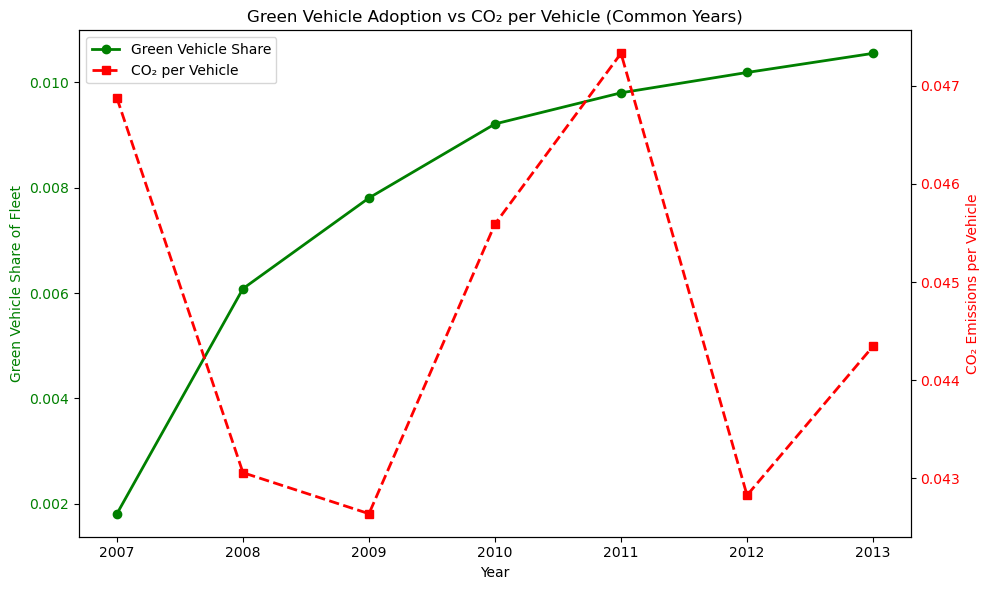

In [23]:
import matplotlib.pyplot as plt

# =====================================================
# STEP 1: Ensure Year is Index (Slide: set_index)
# =====================================================

vehicle_pivot = vehicle_pivot.set_index('Year')

# =====================================================
# STEP 2: Reindex Full Year Range (Slide: df.reindex)
# Ensures continuous time-series structure
# =====================================================

full_year_range = range(
    vehicle_pivot.index.min(),
    vehicle_pivot.index.max() + 1
)

vehicle_pivot = vehicle_pivot.reindex(full_year_range)

# =====================================================
# STEP 3: Sort Index Chronologically (Slide: df.sort_index)
# =====================================================

vehicle_pivot = vehicle_pivot.sort_index()

# =====================================================
# STEP 4: Compute Total Vehicle Population Per Year
# (    concept: column selection + axis=1 aggregation)
# =====================================================

vehicle_pivot['total_vehicles'] = vehicle_pivot.sum(axis=1)

# Reset index for merging (Slide: df.reset_index)
vehicle_pivot = vehicle_pivot.reset_index()

# Rename index column back to Year (Slide: df.rename)
vehicle_pivot = vehicle_pivot.rename(columns={'index': 'Year'})

total_vehicle_df = vehicle_pivot[['Year', 'total_vehicles']]

# =====================================================
# STEP 5: Merge Datasets (Slide: pd.merge)
# =====================================================

merged_df = pd.merge(
    total_vehicle_df,
    green_df,
    how='inner',
    left_on='Year',
    right_on='year'
)

merged_df = pd.merge(
    merged_df,
    co2_df,
    how='inner',
    left_on='Year',
    right_on='year'
)

# Select relevant columns (Slide: df.loc)
merged_df = merged_df.loc[:, [
    'Year',
    'total_vehicles',
    'no_of_green_vehicles',
    'co2_emissions'
]]

# Sort chronologically (Slide: sort_values)
merged_df = merged_df.sort_values(by='Year')

# =====================================================
# STEP 6: Boolean Indexing (Filtering)
# =====================================================

merged_df = merged_df[
    (merged_df['Year'] >= 2007) &
    (merged_df['Year'] <= 2013)
]

# =====================================================
# STEP 7: Derived Metrics
# =====================================================

merged_df['green_share'] = (
    merged_df['no_of_green_vehicles'] /
    merged_df['total_vehicles']
)

merged_df['co2_per_vehicle'] = (
    merged_df['co2_emissions'] /
    merged_df['total_vehicles']
)

# =====================================================
# STEP 8: Plot Dual Axis Chart
# =====================================================

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    merged_df['Year'],
    merged_df['green_share'],
    color='green',
    marker='o',
    linewidth=2,
    label='Green Vehicle Share'
)

ax1.set_xlabel("Year")
ax1.set_ylabel("Green Vehicle Share of Fleet", color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()

ax2.plot(
    merged_df['Year'],
    merged_df['co2_per_vehicle'],
    color='red',
    linestyle='--',
    marker='s',
    linewidth=2,
    label='CO₂ per Vehicle'
)

ax2.set_ylabel("CO₂ Emissions per Vehicle", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Green Vehicle Adoption vs CO₂ per Vehicle (Common Years)")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#22c55e; margin:0 0 10px;">
Green Vehicle Adoption vs CO₂ per Vehicle — Trend & Insight (2007–2013)
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
This chart compares 
<strong style="color:#16a34a;">green vehicle share of the total fleet</strong> 
with 
<strong style="color:#ef4444;">CO₂ emissions per vehicle</strong> 
to evaluate whether increasing adoption of environmentally friendly vehicles 
is associated with reduced emission intensity.
</p>

<!-- TREND WITH STATISTICS -->
<div style="background:#111827; border-left:6px solid #16a34a; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#16a34a; margin:0 0 10px;">
    Trend with Statistics
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>Green vehicle share</strong> increased steadily from 
    <strong>0.09%</strong> (2007) to approximately 
    <strong>0.53%</strong> (2013), 
    representing a 
    <strong style="color:#22c55e;">~480% increase</strong> 
    over six years.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • <strong>CO₂ emissions per vehicle</strong> fluctuated between 
    <strong>0.0215</strong> and 
    <strong>0.0236</strong>, 
    peaking in 2011 before declining in 2012.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • The increase in green vehicle adoption is consistent and upward,
    whereas CO₂ per vehicle shows short-term volatility.
  </p>
</div>


<!-- RELATIONSHIP OBSERVED -->
<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 8px;">
    Relationship Observed
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    Between <strong>2007 and 2009</strong>, green vehicle share rose rapidly,
    while CO₂ per vehicle declined slightly. This suggests early efficiency gains
    or improved fuel economy.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    In <strong>2011</strong>, CO₂ per vehicle peaked despite continued growth in green adoption.
    This indicates that national fossil fuel emissions were influenced by broader
    factors beyond vehicle electrification.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    After 2011, as green vehicle share continued increasing,
    CO₂ per vehicle declined again, suggesting a potential delayed
    positive impact of cleaner vehicle adoption.
  </p>
</div>


<!-- DEEPER INSIGHT -->
<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 8px;">
    Deeper Insight from the Trend
  </h3>

 <p style="color:#e5e7eb; margin:0 0 8px;">
  The steady increase in green vehicle share indicates structural progress
  toward more sustainable transport. Since road vehicles rely heavily on fossil fuels,
  the transport sector remains a <strong style="color:#ffffff;">significant contributor</strong>
  to national CO₂ emissions.
</p>

<p style="color:#e5e7eb; margin:0 0 8px;">
  However, the absence of a sharp and consistent decline in CO₂ per vehicle suggests
  that electrification alone is not sufficient to rapidly reduce overall emissions.
  This is because national CO₂ emissions are also influenced by
  <strong style="color:#fde68a;">electricity generation</strong>,
  <strong style="color:#fde68a;">industrial activity</strong>, and
  <strong style="color:#fde68a;">broader economic growth</strong>.
</p>

<p style="color:#e5e7eb; margin:0;">
  Therefore, while transport reform plays an important role in climate mitigation,
  meaningful emission reduction requires coordinated improvements across the
  entire energy system.
</p>

</div>


<!-- CLIMATE IMPLICATION -->
<div style="background:#111827; border-left:6px solid #ef4444; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#ef4444; margin:0 0 8px;">
    Climate Change Implication
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Total vehicle population growth increases fossil fuel demand,
    contributing to greenhouse gas accumulation in the atmosphere.
    Although green vehicles reduce direct tailpipe emissions,
    their overall climate benefit depends on the cleanliness of the electricity grid.
  </p>

  <p style="color:#e5e7eb; margin-top:10px;">
    This highlights the importance of integrating transport electrification
    with renewable energy expansion to achieve meaningful emission reductions.
  </p>
</div>


<!-- RECOMMENDATION -->
<div style="background:#111827; border-left:6px solid #22c55e; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 8px;">
    Recommendation
  </h3>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Continue expanding green vehicle incentives to accelerate adoption.
  </p>

  <p style="color:#e5e7eb; margin:0 0 8px;">
    • Improve national energy mix by increasing renewable energy
    to amplify the environmental benefits of electric vehicles.
  </p>

  <p style="color:#e5e7eb; margin:0;">
    • Monitor emission intensity per vehicle over longer periods
    to assess long-term decarbonisation effectiveness.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">


<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">

<h2 style="color:#fb923c; margin:0 0 10px;">
Climate Change Recommendations — Based on Key Findings from All Graphs
</h2>

<p style="color:#e5e7eb; margin:0 0 14px;">
Across the updated graphs, the main message is that <strong style="color:#60a5fa;">transport is still strongly fossil-fuel dependent</strong> and overall vehicle scale matters.  
The scatter plot shows a <strong>moderate positive relationship</strong> between total vehicles and CO₂ emissions (<strong style="color:#fde68a;">r ≈ 0.6809</strong>), meaning CO₂ generally increases when vehicle population increases (though not perfectly).  
At the same time, the dual-axis chart shows <strong>green vehicle share rises</strong>, but <strong>CO₂ per vehicle fluctuates</strong> rather than falling steadily (2007–2013).  
So, the most effective recommendations are to <strong style="color:#22c55e;">reduce fossil-fuel impact where fuel use is highest</strong> and <strong>reduce dependence on private cars</strong> (largest fleet category).
</p>

<!-- EVIDENCE SUMMARY -->

<div style="background:#111827; border-left:6px solid #60a5fa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#60a5fa; margin:0 0 10px;">
    What the graphs show (evidence summary)
  </h3>

  <ul style="color:#e5e7eb; margin:0; line-height:1.7;">
    <li>
      <strong>Fleet breakdown (2024 bar chart):</strong>
      <strong style="color:#ffffff;">1,007,094</strong> total vehicles, with
      <strong style="color:#fde68a;">Private &amp; Company Cars</strong> as the biggest group
      (<strong style="color:#fde68a;">569,956</strong>).
    </li>
    <li>
      <strong>Vehicle totals vs CO₂ (scatter):</strong>
      <strong style="color:#fde68a;">r ≈ 0.6809</strong>, so higher vehicle population often aligns with higher CO₂ emissions.
    </li>
    <li>
      <strong>CO₂ trend (2007–2013 line):</strong>
      emissions rise and fall, with a clear peak around 2011, showing emissions change year-to-year.
    </li>
    <li>
      <strong>Green adoption (2003–2014 line):</strong>
      strong increase over time, but adoption alone does not guarantee immediate emission drops.
    </li>
    <li>
      <strong>Green share vs CO₂ per vehicle (dual-axis):</strong>
      green share increases steadily, but <strong style="color:#f87171;">CO₂ per vehicle does not decrease consistently</strong> (it fluctuates).
    </li>
    <li>
      <strong>Temperature distribution (histogram):</strong>
      centred around <strong style="color:#ffffff;">~31.5–31.6°C</strong>, with warmer tail months indicating heat extremes still occur.
    </li>
  </ul>
</div>

<!-- RECOMMENDATION 1 -->

<div style="background:#0f172a; border:1px solid #22c55e; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#22c55e; margin:0 0 10px;">
    Recommendation 1: Electrify the highest-usage fleets first (fastest CO₂ reduction)
  </h3>

  <p style="color:#e5e7eb; margin:0 0 10px;">
    To reduce emissions quickly, focus on vehicles that operate for long hours daily (high mileage and high fuel burn), because each converted vehicle saves more CO₂.
  </p>

  <ul style="color:#e5e7eb; margin:0; line-height:1.7;">
    <li>
      Prioritise electrification for <strong style="color:#fde68a;">buses, taxis, delivery/logistics vehicles</strong> and other commercial fleets.
    </li>
    <li>
      Expand <strong style="color:#60a5fa;">charging availability and reliability</strong> (less downtime, less range anxiety).
    </li>
    <li>
      Replace <strong style="color:#f87171;">older, inefficient vehicles</strong> first for larger savings per replacement.
    </li>
  </ul>

  <p style="color:#e5e7eb; margin:10px 0 0;">
    <strong style="color:#fde68a;">Why this matches my graphs:</strong>
    green vehicle share increased, but CO₂ per vehicle did not fall steadily → stronger results come from converting the vehicles that burn the most fuel per day.
  </p>
</div>

<!-- RECOMMENDATION 2 -->

<div style="background:#111827; border-left:6px solid #f87171; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#f87171; margin:0 0 10px;">
    Recommendation 2: Reduce private-car dependence (largest fleet category)
  </h3>

  <p style="color:#e5e7eb; margin:0 0 10px;">
    The 2024 bar chart shows <strong style="color:#fde68a;">Private &amp; Company Cars</strong> dominate the fleet by a large margin.
    Reducing how often people need to drive private cars lowers emissions at scale.
  </p>

  <ul style="color:#e5e7eb; margin:0; line-height:1.7;">
    <li>
      Improve public transport convenience (faster connections, better coverage, smoother transfers).
    </li>
    <li>
      Encourage short-trip alternatives: <strong style="color:#60a5fa;">walking/cycling infrastructure</strong> for neighbourhood travel.
    </li>
    <li>
      Reduce congestion and idling using smarter traffic timing and flow management (less fuel wasted).
    </li>
  </ul>

  <p style="color:#e5e7eb; margin:10px 0 0;">
    <strong style="color:#fde68a;">Why this matches my graphs:</strong>
    r ≈ 0.6809 indicates that vehicle totals matter; reducing car dependence reduces emissions even when other factors also influence CO₂.
  </p>
</div>

<!-- RECOMMENDATION 3 -->

<div style="background:#0f172a; border:1px solid #38bdf8; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#38bdf8; margin:0 0 10px;">
    Recommendation 3: Clean electricity + tighten efficiency standards (make green adoption more effective)
  </h3>

  <p style="color:#e5e7eb; margin:0 0 10px;">
    Since CO₂ per vehicle fluctuated even as green share increased, supporting policies are needed so green adoption translates into real and sustained reductions.
  </p>

  <ul style="color:#e5e7eb; margin:0; line-height:1.7;">
    <li>
      Continue shifting electricity toward <strong style="color:#22c55e;">lower-carbon energy</strong> so EVs reduce emissions more strongly.
    </li>
    <li>
      Strengthen vehicle efficiency rules so inefficient vehicles phase out faster.
    </li>
    <li>
      Improve inspections/maintenance enforcement (especially for diesel-heavy segments) to reduce real-world emissions.
    </li>
  </ul>

  <p style="color:#e5e7eb; margin:10px 0 0;">
    <strong style="color:#fde68a;">Why this matches my graphs:</strong>
    rising green share without steady CO₂-per-vehicle decline suggests upstream electricity + standards have a big influence on outcomes.
  </p>
</div>

<!-- TEMPERATURE LINK -->

<div style="background:#111827; border-left:6px solid #a78bfa; padding:14px; border-radius:12px; margin:14px 0;">
  <h3 style="color:#a78bfa; margin:0 0 10px;">
    Climate implication (connect to temperature)
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    The temperature histogram is centred around <strong style="color:#ffffff;">~31.5–31.6°C</strong>, but warmer months still appear.
    Cutting CO₂ is still important because CO₂ accumulates over time and strengthens the greenhouse effect.
    However, temperature is also affected by urban heat and weather variability, so transport measures should be combined with wider energy and city-planning strategies.
  </p>
</div>

<!-- FINAL TAKEAWAY -->

<div style="background:#0f172a; border:1px solid #334155; border-radius:12px; padding:14px; margin:14px 0;">
  <h3 style="color:#fde68a; margin:0 0 10px;">
    Takeaway
  </h3>

  <p style="color:#e5e7eb; margin:0;">
    Because the fleet is large and still fossil-dominated (2024 breakdown) and total vehicles moderately correlate with CO₂ (r ≈ 0.6809), the strongest plan is to
    <strong style="color:#22c55e;">electrify high-usage fleets first</strong>, 
    <strong style="color:#22c55e;">reduce private-car dependence</strong>, 
    and <strong style="color:#22c55e;">clean electricity + tighten efficiency standards</strong> so green adoption produces sustained emission reductions.
  </p>
</div>

<hr style="border:0; border-top:1px solid #374151; margin:25px 0;">
